In [1]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

In [13]:
cities = pd.read_csv('data/Top50/top50cities.csv',delimiter=',')
cities

,Unnamed: 0,name,population,lat,lng,countryId,countryName,countryCode,fclName,geonameId
0,0,Moscow,10381222,55.75222,37.61556,2017370,Russia,RU,"city, village,...",524901
1,1,London,7556900,51.50853,-0.12574,2635167,United Kingdom,GB,"city, village,...",2643743
2,2,St Petersburg,5028000,59.93863,30.31413,2017370,Russia,RU,"city, village,...",498817
3,3,Berlin,3426354,52.52437,13.41053,2921044,Germany,DE,"city, village,...",2950159
4,4,Madrid,3255944,40.41650,-3.70256,2510769,Spain,ES,"city, village,...",3117735
5,5,Rome,2318895,41.89193,12.51133,3175395,Italy,IT,"city, village,...",3169070
6,6,Kyiv,2797553,50.45466,30.52380,690791,Ukraine,UA,"city, village,...",703448
7,7,Paris,2138551,48.85341,2.34880,3017382,France,FR,"city, village,...",2988507
8,8,Bucharest,1877155,44.43225,26.10626,798549,Romania,RO,"city, village,...",683506
9,9,Budapest,1741041,47.49801,19.03991,719819,Hungary,HU,"city, village,...",3054643


In [16]:
#import nodes to get id from nodes/hosts
hosts = pd.DataFrame() #creates a new dataframe that's empty
for idx,city in cities.iterrows():#.loc[cities['2017']>50000].iterrows():
    for p in range(1,14):
        if (os.path.exists('data/Top50/hosts/'+city['name']+str(p)+'.csv')):
            df = pd.read_csv('data/Top50/hosts/'+city['name']+str(p)+'.csv',index_col=False)
            hosts = pd.concat([hosts,df]).reset_index(drop=True)
print(len(hosts))
hosts=hosts.drop_duplicates()
print(len(hosts))
hosts

10586
10582


,id,publicName,avatarUrl,isVerified,status,lastLogin,aboutText,responseRate,responseTimeText,responseRateText,totalReferencesCount,profileLink,friendsCount,languages,city
0,2009059021,Alexey Sedov,https://tcdn.couchsurfing.com/gPQnUnQqAzH-QEdh...,True,yes,about 9 hours,Good man,100,replies within a day,100% response rate,4,/people/alexey-sedov,13,{'fluent': []},Moscow
1,2008295707,Alexey Perfilyev,https://tcdn.couchsurfing.com/E46TCOOpAktjGSSN...,True,yes,about 9 hours,"Hi, my name is Alexey. Now I'm an engineer and...",98,replies within 1-3 days,98% response rate,23,/people/alexey_perfilyev,17,"{'fluent': [{'code': 'rus', 'name': 'Russian'}...",Moscow
2,2009276730,George Zheleznyi,https://tcdn.couchsurfing.com/juLx6e9yn3WEMz54...,True,yes,about 3 hours,Currently running a startup in the vegan food ...,-1,replies within a day,-1% response rate,1,/people/george-zheleznyi,5,"{'fluent': [{'code': 'rus', 'name': 'Russian'}...",Moscow
3,2007438797,Sergey Savkin,https://tcdn.couchsurfing.com/v6r0UbCdztArIqUp...,True,yes,about 2 hours,"If you want to stay, please read all about my ...",100,replies within a day,100% response rate,6,/people/sergey-savkin-1,20,"{'fluent': [{'code': 'rus', 'name': 'Russian'}]}",Moscow
4,2009017440,Irina Arhipova,https://tcdn.couchsurfing.com/6bxRtCZTVy06mP7h...,True,yes,13 minutes,"Friends, please attention we are live 6 km fro...",100,replies within a day,100% response rate,5,/users/2009017440,37,"{'fluent': [{'code': 'rus', 'name': 'Russian'}...",Moscow
5,2008873184,Arina Barinova,https://tcdn.couchsurfing.com/3bO1UIJ4i6JpckIS...,True,yes,30 minutes,Hey everyone!)\nI’m a positive person who want...,95,replies within 1-3 days,95% response rate,4,/people/arina-barinova,11,"{'fluent': [{'code': 'rus', 'name': 'Russian'}...",Moscow
6,2003698502,Dmitry Zorin,https://tcdn.couchsurfing.com/mDaphugqZIorzF7_...,True,yes,about 2 hours,CURRENT MISSION\r\n\r\nTo find my truly missio...,92,replies within a day,92% response rate,33,/people/dmitryzorin,57,"{'fluent': [{'code': 'rus', 'name': 'Russian'}...",Moscow
7,2005423146,Anton & Tanya Zhilenko,https://tcdn.couchsurfing.com/Ih8ynFKoFO1Z9kaA...,True,yes,about 8 hours,"My name's Anton, I leave near Moscow, in Koro...",100,replies within a day,100% response rate,16,/people/anton-zhilenko,18,"{'fluent': [{'code': 'rus', 'name': 'Russian'}]}",Moscow
8,2008461429,Sergei Grosov,https://tcdn.couchsurfing.com/0NLw1WG0AhtRfidy...,True,yes,about 2 hours,A bit sportsman and traveller :),100,replies within a day,100% response rate,12,/users/2008461429,21,"{'fluent': [{'code': 'rus', 'name': 'Russian'}...",Moscow
9,2007897688,Diana Pacijevska,https://tcdn.couchsurfing.com/Ic6Sn0Ldme6NBr4b...,True,yes,about 1 hour,"Before you make a request, please, be aware of...",94,replies within 1-3 days,94% response rate,8,/people/diana-pacijevska,7,"{'fluent': [{'code': 'rus', 'name': 'Russian'}...",Moscow


In [8]:
rev= pd.read_csv('data/reviews_total_geo_2.csv')

/Users/Eike/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6,7,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
hosts['lat']='NaN'
hosts['lng']='NaN'
#rev['city']='NaN'
hosts['country']='NaN'
for idx,city in cities.iterrows():
    l = hosts.loc[hosts.city==city['name']].index.tolist()
    for i in l:
        hosts.set_value(i,'lat',city['lat'])
        hosts.set_value(i,'lng',city['lng'])
        hosts.set_value(i,'city',city['name'].lower())
        hosts.set_value(i,'country',city['countryCode'].lower())
hosts

In [6]:
G = nx.MultiDiGraph()
#Add hosts to the network
G.add_nodes_from([(rows['name'],{'lat':rows['lat'],'lng':rows['lng']}) for idx,rows in hosts.iterrows()])
#Add users to the network from the source reviews/surfers

#Add users to the network from the source reviews/hosts



links = []
user_id_unique=set(hosts['id'].tolist())
G.add_nodes_from([(rows['name'],{'lat':rows['lat'],'lng':rows['lng']}) for idx,rows in cities.iterrows()])
G.add_nodes_from([(rows['fromPublicAddressDescription'],{'lat':rows['lat'],'lng':rows['lng']}) for idx,rows in rev.iterrows() if rows['lat'] !='NaN' and rows['lng']!='NaN'])
#for idx,r in rev.iterrows():
    #if r['from'] in hosts['id'].tolist() and r['to'] in hosts['id'].tolist():
    #if r['from'] in list(G.nodes()):
    #    if r['relationshipType']=='surf':
    #        #G.add_edge(hosts.loc[hosts['id']==r['from']]['city'].item(),hosts.loc[hosts['id']==r['to']]['city'].item())
    #        G.add_edge()
    #    if r['relationshipType']=='host':
    #        G.add_edge(hosts.loc[hosts['id']==r['to']]['city'].item(),hosts.loc[hosts['id']==r['from']]['city'].item())
#G.add_edges_from([(rows['to'],rows['from'])for index,rows in rev[['to','from','relationshipType']].iterrows() if rows['relationshipType']=='host' and G.has_node(rows['to']) and G.has_node(rows['from'])])
#G.add_edges_from([(rows['from'],rows['to'])for index,rows in rev[['to','from','relationshipType']].iterrows() if rows['relationshipType']=='surf' and G.has_node(rows['to']) and G.has_node(rows['from'])])



KeyError: 'lat'

KeyboardInterrupt: 

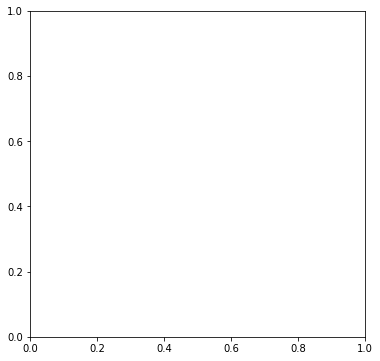

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(G, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

In [ ]:
sg = next(nx.connected_component_subgraphs(G.to_undirected()))

In [ ]:
pos = {x[0]:(x[1]['lat'], x[1]['lng']) for x in list(G.nodes(data=True))}
pos

In [ ]:
deg = nx.degree(sg)
sizes = [5 * deg[iata] for iata in sg.nodes]

In [ ]:
plt.figure(figsize = (10,9))
m = Basemap(projection='merc',llcrnrlon=-30,llcrnrlat=25,urcrnrlon=50,
urcrnrlat=70, lat_ts=0, resolution='l',suppress_ticks=True)
mx, my = m(cities['lng'].values, cities['lat'].values)
pos = {}
for count, elem in enumerate (cities['name']):
     pos[elem] = (mx[count], my[count])

nx.draw_networkx_nodes(G, pos = pos, node_list =G.nodes() ,node_color = 'firebrick', alpha = 0.8, node_size = [v[1] * 3 for v in G.degree()])
nx.draw_networkx_edges(G, pos = pos, edge_color='cornflowerblue', alpha=0.2, arrows = False)
#nx.draw_networkx_edges(G, pos = pos, edge_color='g', alpha=0.2, arrows = False)
m.drawcountries(linewidth = 3)
#m.drawstates(linewidth = 0.2)
m.drawcoastlines(linewidth=3)
m.bluemarble()
plt.tight_layout()
plt.savefig("map.png", format = "png", dpi = 300)

plt.show()